# 문제 정의

## 목적
- To understand the influence of the parents background, test preparation etc on students performance
- 총 5개의 컬럼에 따른 학생의 performance(3과목 점수 - math, reading, writing)경향성 확인

## 컬럼설명

- `gender` : 성별
- `race/ethnicity` : 인종/민족 
    - 익명데이터로 자세한 내용은 알기 어려움
- `parental level of education` : 부모의 학력
    - some high school -> high school -> some college -> associate's degree -> bacheolor's degree -> master's degree 
- `lunch` : 무상급식 여부
    - https://www.feedingamerica.org/take-action/advocate/federal-hunger-relief-programs/national-school-lunch-program
- `test preparation course` : 사전학습(?)
    - https://en.wikipedia.org/wiki/Test_preparation
    
    
    

# 라이브러리

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# 데이터셋 확인

In [3]:
# load dataset
INPUT_PATH = '/kaggle/input/students-performance-in-exams/StudentsPerformance.csv'
df = pd.read_csv(INPUT_PATH)

In [13]:
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


- object 컬럼 5개
- int 컬럼 3개

In [4]:
# info 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
# 컬럼별 unique 수
# object 컬럼의 경우 cardinality가 많이 없다.
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
# 컬럼별 unique값 확인
for col in df.columns.unique()[:5]:
    print(col)
    print(sorted(df[col].unique()))
    print('--'*40)

gender
['female', 'male']
--------------------------------------------------------------------------------
race/ethnicity
['group A', 'group B', 'group C', 'group D', 'group E']
--------------------------------------------------------------------------------
parental level of education
["associate's degree", "bachelor's degree", 'high school', "master's degree", 'some college', 'some high school']
--------------------------------------------------------------------------------
lunch
['free/reduced', 'standard']
--------------------------------------------------------------------------------
test preparation course
['completed', 'none']
--------------------------------------------------------------------------------


In [16]:
# 결측치 값 x
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [18]:
# 중복값 x
df.duplicated().sum()

0

# EDA

## 단일컬럼 분석

In [20]:
# 자료형별 분류
arr_obj = df.columns[:5] # object
arr_int = df.columns[5:] # int

In [21]:
# decribe - object 컬럼 
df[arr_obj].describe().T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental level of education,1000,6,some college,226
lunch,1000,2,standard,645
test preparation course,1000,2,none,642


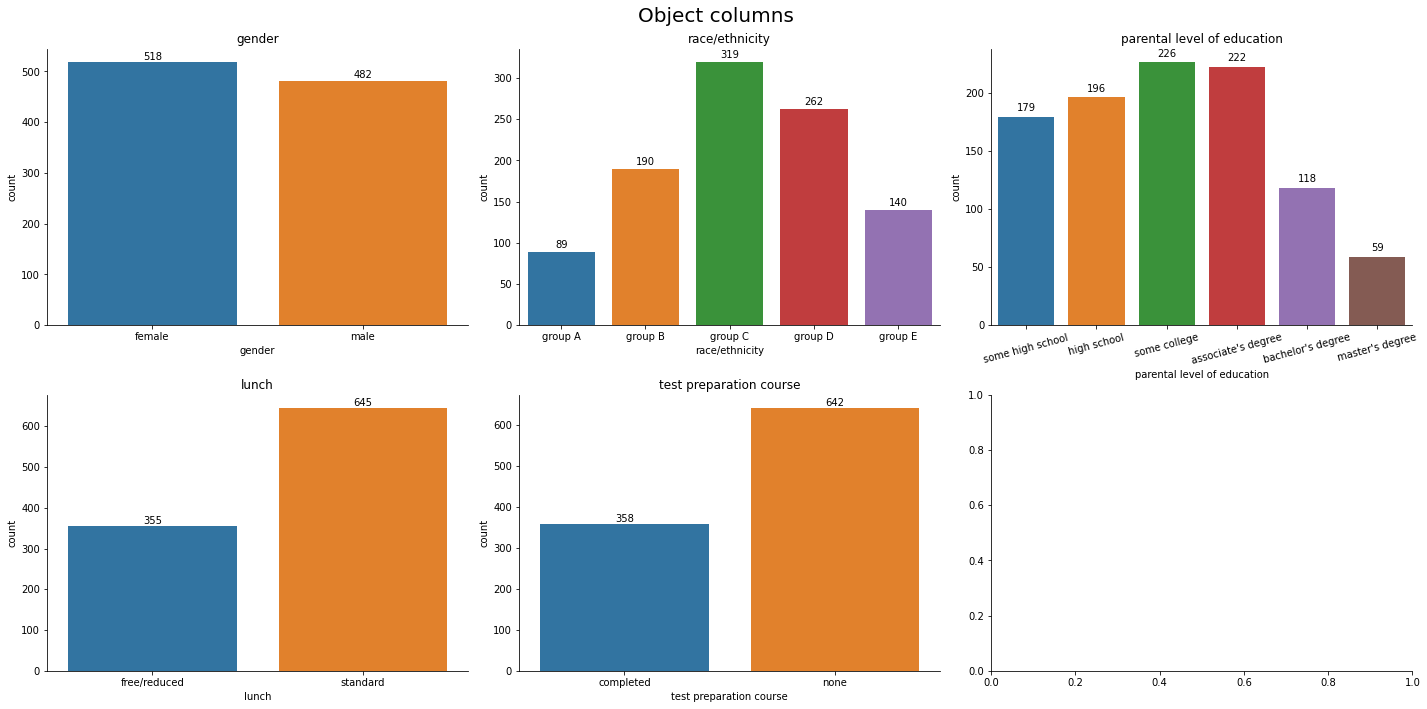

In [66]:
# object 컬럼 시각화
fig, ax = plt.subplots(2, 3, figsize=(20,10))

for idx, col in enumerate(arr_obj):
    x_order = sorted(df[col].unique())
    if col == 'parental level of education': 
        x_order = ['some high school', 'high school', 'some college', 
                   "associate's degree", "bachelor's degree", "master's degree"]
    
    g = sns.countplot(x=col, data=df, order=x_order, ax=ax[idx//3, idx%3]) 
    g.set_title(col)
    for p in ax[idx//3, idx%3].patches:
        height = p.get_height()
        ax[idx//3, idx%3].text(p.get_x() + p.get_width() / 2., height+5, height, ha='center',size=10)
    
    if col == 'parental level of education':
        g.set_xticklabels(g.get_xticklabels(), rotation=15)
        sns.despine()
        
fig.suptitle('Object columns', size=20)
plt.tight_layout()
plt.show()

- 학부모 학력
    - 생각보다 학사이상이 많이 없음
    - 고등학교, 대학 중퇴도 많다
    - 학비 비싸서 그런가?, 우리나라 현황은? 

In [76]:
x_order = ['some high school', 'high school', 'some college', 
           "associate's degree", "bachelor's degree", "master's degree"]
grouped = pd.DataFrame(df.value_counts('parental level of education', normalize=True)[x_order])
grouped['cumsum'] = grouped.cumsum()
grouped = grouped.rename(columns={0:'prop.', 'cumsum':'prop. cumsum'})
grouped 

,prop.,prop. cumsum
parental level of education,,
some high school,0.179,0.179
high school,0.196,0.375
some college,0.226,0.601
associate's degree,0.222,0.823
bachelor's degree,0.118,0.941
master's degree,0.059,1.000


In [22]:
# decribe - int 컬럼 
df[arr_int].describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


- 셋다 분포비슷

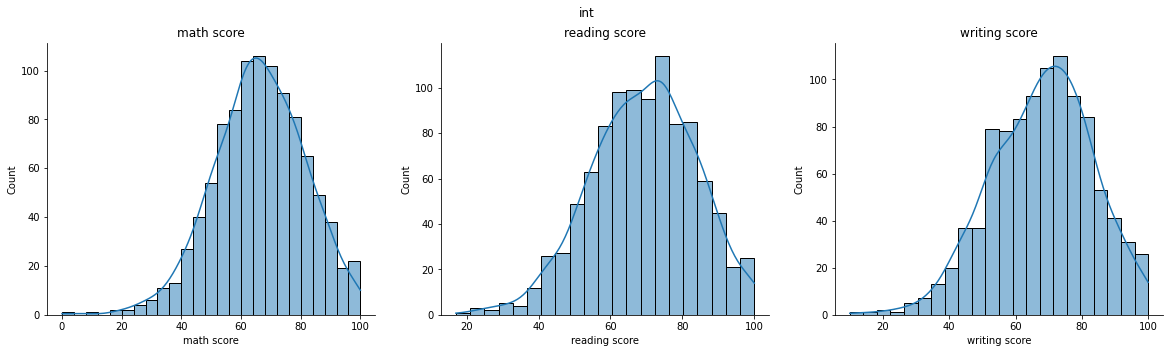

In [65]:
# int column 시각화
fig, ax = plt.subplots(1, 3, figsize=(20,5))

for idx, col in enumerate(arr_int):
    g = sns.histplot(x=col, data=df, kde=True, ax=ax[idx])
    g.set_title(col)
    sns.despine()
    
fig.suptitle('int')
plt.show()

- reading과 writing의 상관관계가 매우 높다
    - 수학머리랑, 언어적 머리랑 쪼금은 다르다?

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


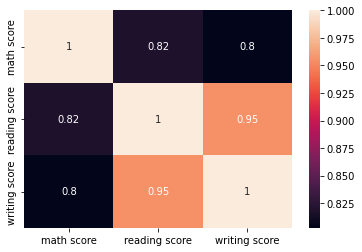

In [53]:
score_corr = df[arr_int].corr() 
display(score_corr)
sns.heatmap(score_corr, annot=score_corr)
plt.show()

In [77]:
# 시각화를 위하여 melt로 tidy data 생성
col = 'gender'
pd.melt(df, id_vars= [col], value_vars=arr_int)

,gender,variable,value
0,female,math score,72
1,female,math score,69
2,female,math score,90
3,male,math score,47
4,male,math score,76
...,...,...,...
2995,female,writing score,95
2996,male,writing score,55
2997,female,writing score,65
2998,female,writing score,77


- gender
    - 남성이 math 점수가 높고
    - 여성이 reading 및 writing 점수가 높다. 
- race/ethnicity
   

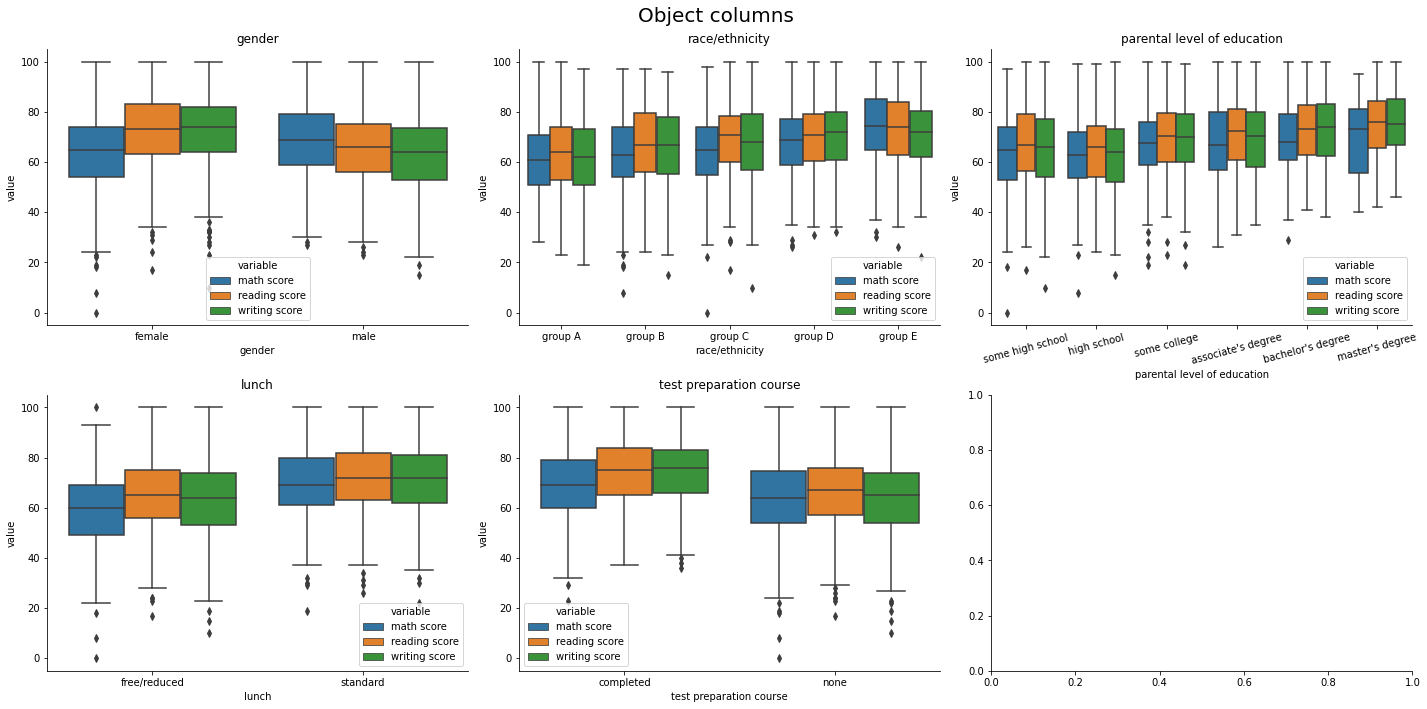

In [81]:
# object 컬럼 시각화
fig, ax = plt.subplots(2, 3, figsize=(20,10))

for idx, col in enumerate(arr_obj):
    # melt dataset
    tmp = pd.melt(df, id_vars= [col], value_vars=arr_int)

    x_order = sorted(df[col].unique())
    if col == 'parental level of education': 
        x_order = ['some high school', 'high school', 'some college', 
                   "associate's degree", "bachelor's degree", "master's degree"]
    
    g = sns.boxplot(y='value', x=col, data=tmp, order=x_order, hue='variable', ax=ax[idx//3, idx%3]) 
    g.set_title(col)

    
    if col == 'parental level of education':
        g.set_xticklabels(g.get_xticklabels(), rotation=15)
        sns.despine()
        
fig.suptitle('Object columns', size=20)
plt.tight_layout()
plt.show()

In [147]:
perms = []
for p in permutations(arr_obj,2):
    if df[p[0]].nunique() <= 2:
        perms.append(p)
perms

[('gender', 'race/ethnicity'),
 ('gender', 'parental level of education'),
 ('gender', 'lunch'),
 ('gender', 'test preparation course'),
 ('lunch', 'gender'),
 ('lunch', 'race/ethnicity'),
 ('lunch', 'parental level of education'),
 ('lunch', 'test preparation course'),
 ('test preparation course', 'gender'),
 ('test preparation course', 'race/ethnicity'),
 ('test preparation course', 'parental level of education'),
 ('test preparation course', 'lunch')]

- `gender` vs
    - `race/ethnicity`
        - 그룹 B,C의 여성비율이 다른그룹에 비해 높다. 
        - 여성과 남성이 강세인 과목이 달랐기 때문에 인종/민족 별로 과목별 성적이 다를 수 있다.
            - 그룹 B,C의 언어과목이 다른 그룹에 비해 높은가? 
    - `parental level of education`
        - 학부모의 최종학력이 고졸인 경우에만 남자 학생의 비율이 높다.
        - 의미가 있나? 통계검정 필요?

- `
           

In [158]:
np.mean(df['gender']=='female')

0.518

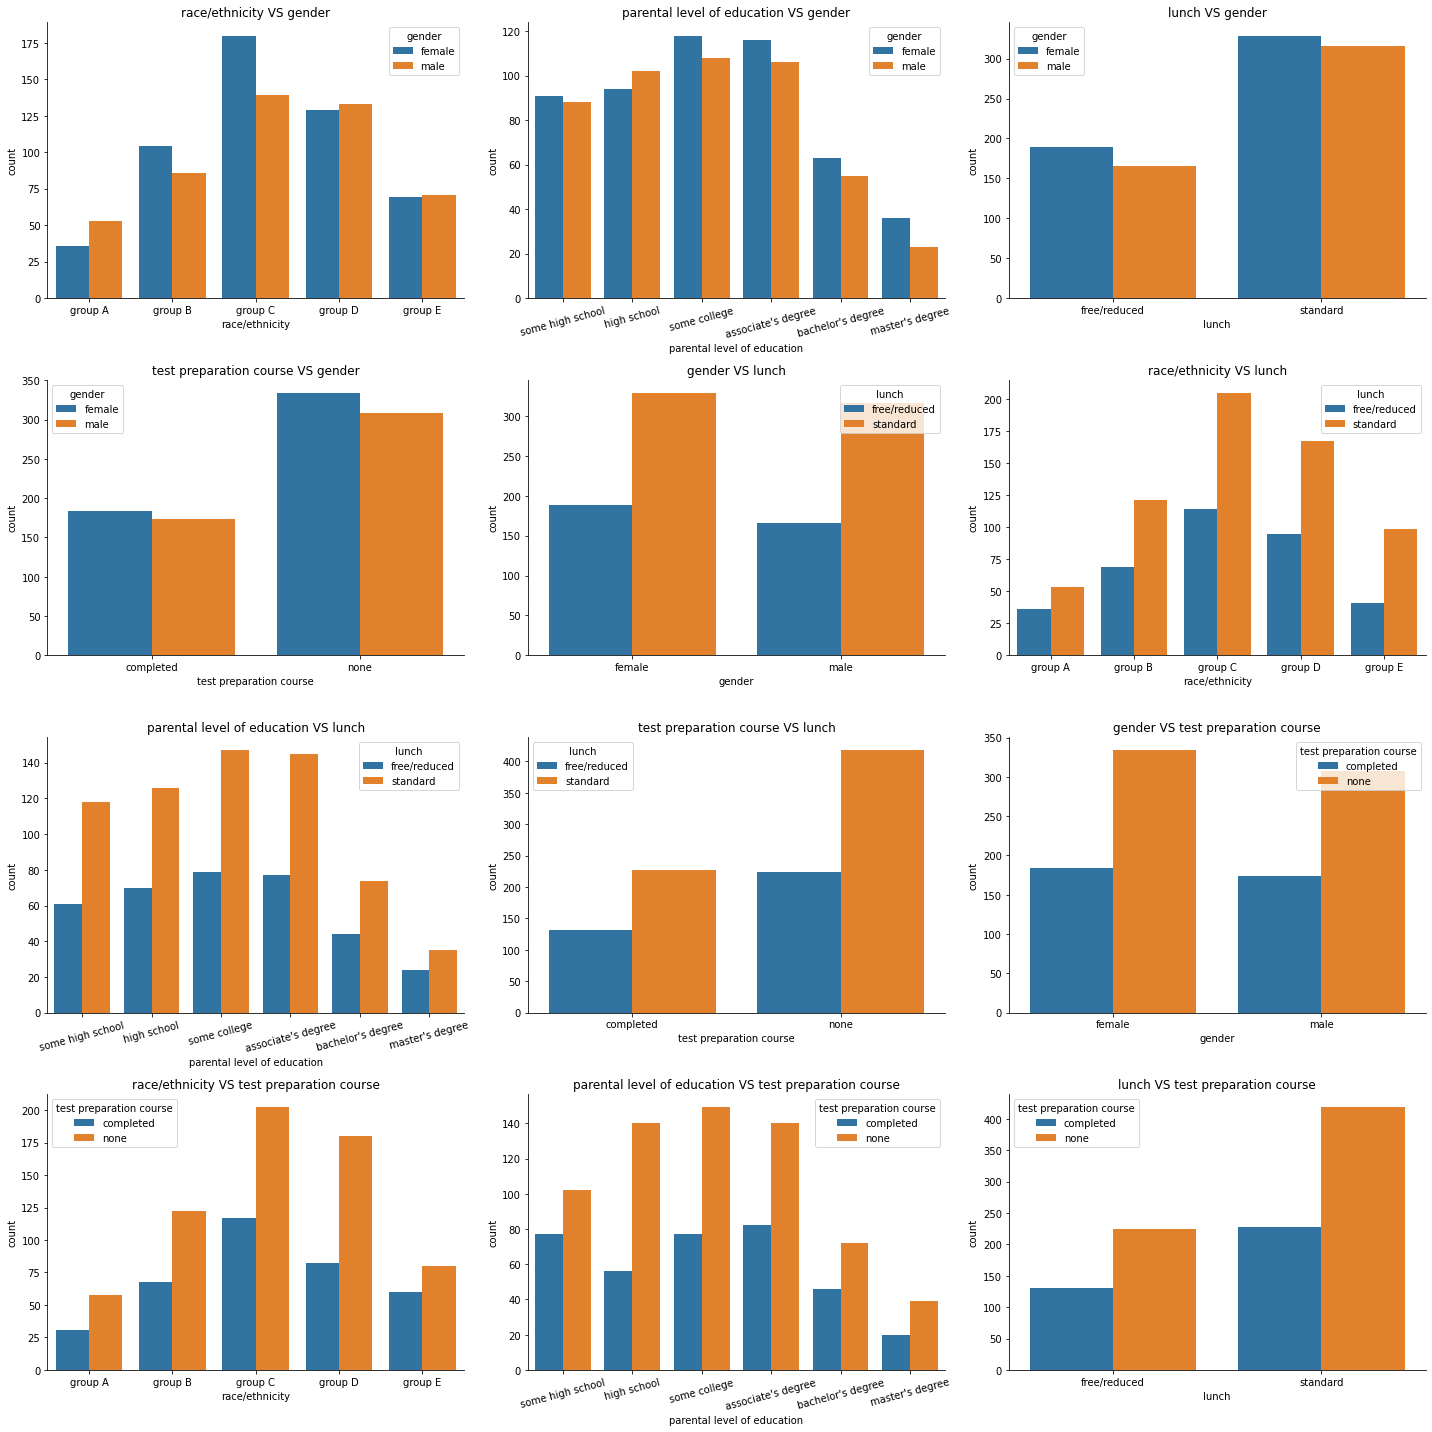

In [159]:
from itertools import permutations 
fig, ax = plt.subplots(4,3,figsize=(20,20))

for idx, pm in enumerate(perms):
    y = 'count'
    x = pm[1]
    hue = pm[0]
    
    grouped = df.groupby([hue,x]).size().reset_index().rename(columns={0:y})
    
    x_order = sorted(df[x].unique())
    if x == 'parental level of education' or hue =='parental level of education':
        x_order = ['some high school', 'high school', 'some college', 
                   "associate's degree", "bachelor's degree", "master's degree"]
    
    g = sns.barplot(y=y, x=x, hue=hue, data=grouped, order=x_order, ax=ax[idx//3, idx%3])
    g.set_title(x+' VS '+hue)
    if x == 'parental level of education' or hue =='parental level of education':
        g.set_xticklabels(g.get_xticklabels(), rotation=15)
        sns.despine()

plt.tight_layout()
plt.show()